In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
x=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 
              'EstimatedSalary']]
y=df['Exited']

In [10]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

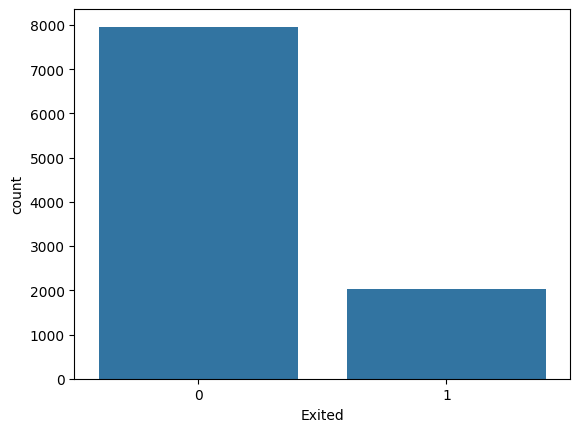

In [11]:
sns.countplot(x=y)

In [12]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

We want to improve this imbalance

undersamplers use kel tr y.value_counts= becomes same by reduction

oversamplers use kel tr y.value_counts becomes same by repeatation..It is used mostly

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
ros=RandomOverSampler(random_state=0)

In [15]:
x_rep,y_rep=ros.fit_resample(x,y)

In [16]:
y=y_rep
x=x_rep

<Axes: xlabel='Exited', ylabel='count'>

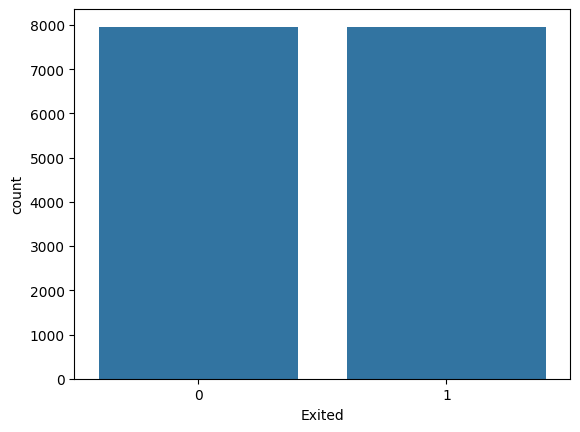

In [17]:
sns.countplot(x=y)

In [18]:
y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Cross validation

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

Neural network

In [21]:
from sklearn.neural_network import MLPClassifier

In [38]:
ann=MLPClassifier(
    hidden_layer_sizes=(100,100,100),
    max_iter=500,
    activation='relu'
)

In [39]:
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500)

In [40]:
y_pred=ann.predict(x_test)

In [41]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [42]:
print(accuracy_score(y_test,y_pred))

0.9065796082370668


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1981
           1       0.89      0.93      0.91      2001

    accuracy                           0.91      3982
   macro avg       0.91      0.91      0.91      3982
weighted avg       0.91      0.91      0.91      3982



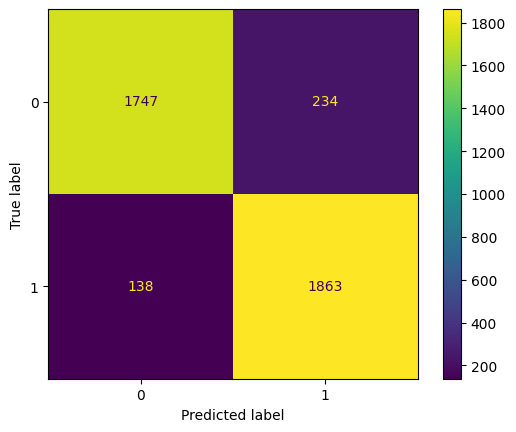

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)